<div style="border:solid green 3px; padding: 20px">
																							
<b>Привет!</b>
																					
Меня зовут Сороколетов Илья и я буду проверять твой проект. 
																					
Предлагаю общаться на «**ты**», но если тебе будет комфортнее общаться на «**вы**», то сообщи об этом в комментариях)
																					
																					
Для твоего удобства, я буду выделять свои комментарии следующим образом:
																					
<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> Самые важные замечания. Они указывают на ключевые моменты, которые влияют на конечный результат проекта. </div>
																					
<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> Советы или замечания, которые помогут сделать твою работу лучше, но необязательны к выполнению.
																					
</div>
																					
<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> Так я выделяю все остальные комментарии.</div>
																					
																					
Пометками <b>v1-v2-v3-...</b> я буду отмечать версию проверки. Так ты сможешь быстро найти мои новые комментарии.
																					
Давай работать над проектом в диалоге: если ты что-то меняешь в проекте по моим рекомендациям — пиши об этом. Выбери для своих комментариев какой-то заметный цвет, так мне будет легче отследить изменения, например вот так:
																					    
<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>
</div>
																					
<b>Пожалуйста, не перемещай, не изменяй и не удаляй мои комментарии.</b> Если ты оставляешь свои комментарии, то делай это под моими, чтобы сообщения были расположены в хронологическом порядке. Всё это поможет выполнить повторную проверку твоего проекта быстрее. 
																					
Перед отправкой работы я рекомендую нажимать Kernel -> Restart & Run All. Это перезапустит ядро и по очереди выполнит все ячейки. Так ты сможешь проверить, что всё работает корректно. Кнопка Kernel находится в панели сверху
																					
Обязательно задавай вопросы если они возникнут, а я перехожу к проверке)
																					
P.S. На всякий случай, я оставлю пустой шаблон для твоих комментариев ниже. Кликни два раза на мой комментарий, скопируй последние четыре строчки кода и вставляй их в пустую ячейку там, где ты хочешь оставить комментарий. Не забудь только перед этим сменить тип ячейки на Markdown. Быстро это можно сделать так: кликнуть на ячейку - нажать ESC - нажать M. 
																					    
																					    
<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Удали этот текст и вместо него напиши свой комментарий 🙂
</div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Молодец, что добавляешь краткое описание задачи. Это поможет тебе быстро вспомнить о чем проект, если спустя время ты решишь к нему вернуться)
</div>

### Откройте файл с данными и изучите общую информацию

Импортируем необходимые для работы библиотеки, читаем файл.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

Увеличим максимальное количество отображающихся столбцов.

In [2]:
#pd.options.display.float_format = '{:,.2f}'.format
data  = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
pd.set_option('display.max_columns', None)
data.head(5) 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Все библиотеки лучше импортировать отдельно в первой ячейке. Это позволит тебе в любой момент добавить ещё одну библиотеку без перезаписи переменных.
</div>

 <div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Обрати внимание, что часть столбцов заменилась на "...". Чтобы это исправить, нужно увеличить максимальное количество отображающихся столбцов командой
			
	pd.set_option('display.max_columns', None)
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br> Увеличил максимальное количество отображающихся столбцов.
</div>

In [3]:
# Изучаем общую информацию о полученном датафрейме.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

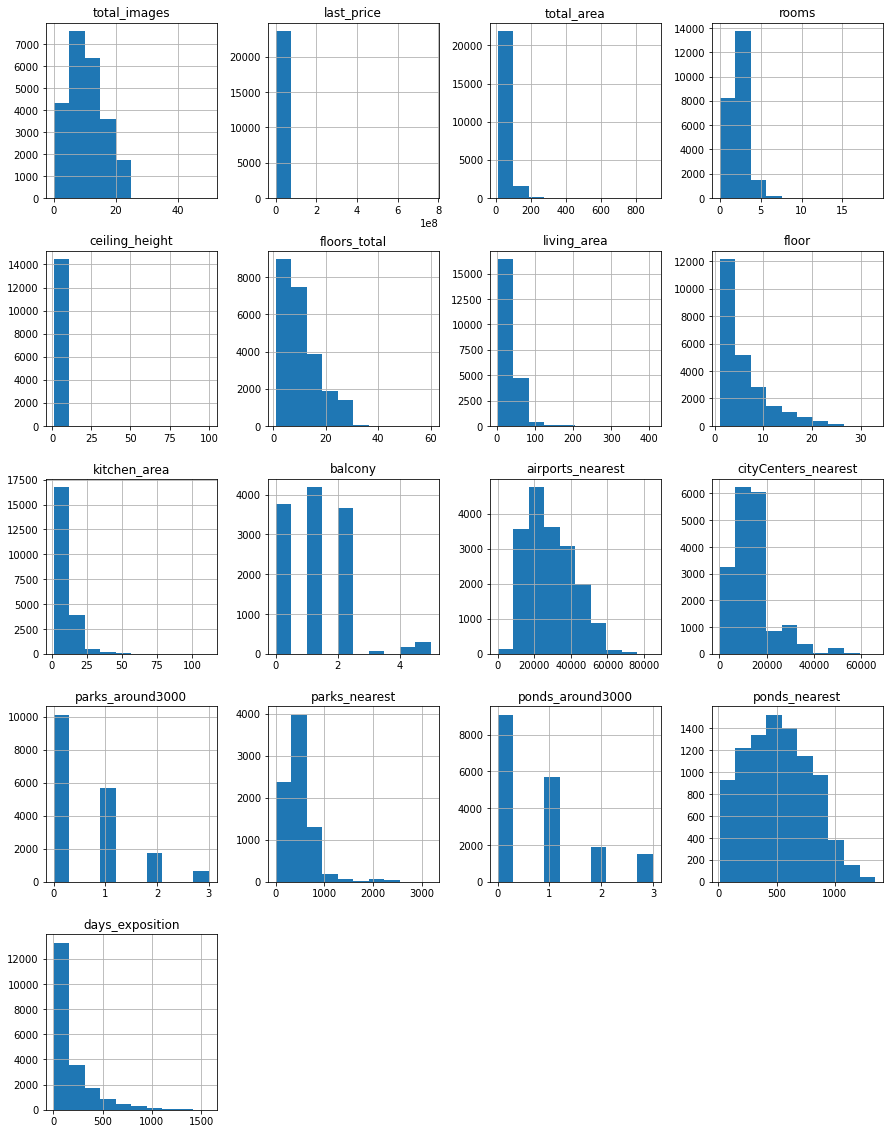

In [4]:
# Cтроим гистограмму для всех числовых столбцов таблицы на одном графике.
data.hist(figsize=(15, 20))
plt.show()

В данном датасете содержится 23699 записи. Для целого ряда столбцов, есть пропущенные значения и некорректные типы данных. По построенным, гистограммам видно, что в данных присутствуют аномальные значения. Также, необходимо будет проверить данные на наличие явных и неявных дубликатов.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Графики построено верно! 
</div>

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>Здесь необходимо написать короткий вывод о проблемах с данными (пропуски, дубликаты, неверный тип данных, странные значения и т.д.)
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br> Написал краткий вывод выше.
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b>
<br>Правка выполнена 👍
</div>

### Предобработка данных

Приводим названия столбцов в надлежащий вид.

In [5]:
data.columns = [col.lower().replace(' ','_') for col in data.columns]
data.rename(columns={'citycenters_nearest': 'city_centers_nearest'}, inplace=True)
data.rename(columns={'parks_around3000': 'parks_around_3km'}, inplace=True)
data.rename(columns={'ponds_around3000': 'ponds_around_3km'}, inplace=True)
data.head(5) 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Отлично, что ты увеличиваешь лимит для отображаемых столбцов, но лучше это делать в самом начале)
</div>

Определяем, в каких столбцах есть пропуски и их количество.

In [6]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3km         5518
parks_nearest           15620
ponds_around_3km         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Определяем количество явных дубликатов.

In [7]:
data.duplicated().sum()

0

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Изменим типы данных на необходимые с следующих столбцах. В тех столбцах, где есть пропуски сразу заменим их на нули, так как мы не знаем происхождение этих пропусков и ни на что другое заменить не можем. Оставиим пропуски в тех столбцах, где логичную замену предложить невозможно. 

Столбец с общим коичеством этажей в доме оставим без изменений, так как их меньше 1% всех значений.

In [9]:
data['last_price'] = data['last_price'].astype('int')
data['balcony'] = data['balcony'].fillna(0).astype(int)
data['parks_around_3km'] = data['parks_around_3km'].fillna(0).astype(int)
data['ponds_around_3km'] = data['ponds_around_3km'].fillna(0).astype(int)
data['locality_name'] = data['locality_name'].fillna('unknown')
data['is_apartment'] = data['is_apartment'].fillna(False).astype(bool)
# В данном случае логичной заменой высоты потолков будут медианные значения, чтобы не оставлять Nan.
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
# Зададим правильную маску для даты.
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data.isna().sum()
#data.head(10)

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name               0
airports_nearest         5542
city_centers_nearest     5519
parks_around_3km            0
parks_nearest           15620
ponds_around_3km            0
ponds_nearest           14589
days_exposition          3181
dtype: int64

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Пропуски в столбце floors_total можно заменить на этаж квартиры либо оставить как есть или либо вообще удалить, так как пропусков меньше 1%
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br> В столбце floors_total оставил значения без изменений, так как их менее 1%.
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Согласен с таким решением для столбца с высотой потолков, так как основная часть данных в этом столбце находится в небольшом диапазоне.
</div>

Пропуски в данных могли возникнуть на этапах копирования, считывания, смене формата при выгрузке данных. Изначально, некоторые поля могли быть заполнены таким образом, что на одном из описанных выше этапов система восприняла их как пропуски. Также не стоит исключать человеческий фактор.

Изучим уникальные значения в столбце с названиями и устраним неявные дубликаты.

In [10]:
# Определимся с условием для устранения, неявных дубликатов в locality_name.
data.locality_name.value_counts()

Санкт-Петербург       15721
посёлок Мурино          522
посёлок Шушары          440
Всеволожск              398
Пушкин                  369
                      ...  
поселок Калитино          1
деревня Каськово          1
деревня Иссад             1
посёлок Ропша             1
деревня Новолисино        1
Name: locality_name, Length: 365, dtype: int64

Избавляемся от неявных дубликатов следующим образом.

In [11]:
data['locality_name'] = (data['locality_name']
                            .str.replace('ё', 'е')
                            .replace(['городской посёлок ',
                                      'городской поселок ',
                                      'посёлок городского типа ',
                                      'поселок городского типа ',
                                      'посёлок ',
                                      'поселок ',
                                      'при железнодорожной ',
                                      'садоводческое некоммерческое товарищество ',
                                      'садовое товарищество ',
                                      'станции ',
                                      'село ',
                                      'имени ',
                                      'пансионат ',
                                      'деревня ',
                                      'коттеджный ',], '', regex=True)
) 
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest,days_exposition
0,20,13000000,108.00,2019-03-07,3,2.70,16.0,51.00,8,False,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN
1,7,3350000,40.40,2018-12-04,1,2.65,11.0,18.60,1,False,False,False,11.00,2,Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0
2,10,5196000,56.00,2015-08-20,2,2.65,5.0,34.30,4,False,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0
3,0,64900000,159.00,2015-07-24,3,2.65,14.0,NaN,9,False,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0
4,2,10000000,100.00,2018-06-19,2,3.03,14.0,32.00,13,False,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0
5,10,2890000,30.40,2018-09-10,1,2.65,12.0,14.40,5,False,False,False,9.10,0,Янино-1,NaN,NaN,0,NaN,0,NaN,55.0
6,6,3700000,37.30,2017-11-02,1,2.65,26.0,10.60,6,False,False,False,14.40,1,Парголово,52996.0,19143.0,0,NaN,0,NaN,155.0
7,5,7915000,71.60,2019-04-18,2,2.65,24.0,NaN,22,False,False,False,18.90,2,Санкт-Петербург,23982.0,11634.0,0,NaN,0,NaN,NaN
8,20,2900000,33.16,2018-05-23,1,2.65,27.0,15.43,26,False,False,False,8.81,0,Мурино,NaN,NaN,0,NaN,0,NaN,189.0
9,18,5400000,61.00,2017-02-26,3,2.50,9.0,43.60,7,False,False,False,6.50,2,Санкт-Петербург,50898.0,15008.0,0,NaN,0,NaN,289.0


In [12]:
# Смотрим на результат
data.locality_name.unique()

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Федоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Новый Свет', 'Сланцы',
       'Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       'Павлово', 'Оредеж', 'Копорье', 'Молодежное', 'Тихвин', 'Победа',
       'Нурма', 'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск',

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Здесь всё верно, но лучше постараться автоматизировать этот процесс)
</div>

### Добавление в таблицу новых столбцов

In [13]:
# Добавим в таблицу следующие столбцы:
# Цена одного квадратного метра
data['square_meter_price'] = (data['last_price'] / data['total_area']).round(2)
# День недели, месяц и год публикации объявления
data['publication_weekday'] = data['first_day_exposition'].dt.weekday
data['publication_month'] = data['first_day_exposition'].dt.month
data['publication_year'] = data['first_day_exposition'].dt.year    
# Функция, категоризирующая значения столбца этажи по трем типам.
def categorize_floors(i):
    if i['floor'] == 1:
        return 'первый'
    elif i['floor'] == i['floors_total']:
        return 'последний'
    else:
        return 'другой'
data['type_of_floor'] = data.apply(categorize_floors, axis=1) 
# Расстояние до центра города в километрах в км.
data['center_distance'] = (data['city_centers_nearest'] / 1000).round(0)
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest,days_exposition,square_meter_price,publication_weekday,publication_month,publication_year,type_of_floor,center_distance
0,20,13000000,108.00,2019-03-07,3,2.70,16.0,51.00,8,False,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,120370.37,3,3,2019,другой,16.0
1,7,3350000,40.40,2018-12-04,1,2.65,11.0,18.60,1,False,False,False,11.00,2,Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,82920.79,1,12,2018,первый,19.0
2,10,5196000,56.00,2015-08-20,2,2.65,5.0,34.30,4,False,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785.71,3,8,2015,другой,14.0
3,0,64900000,159.00,2015-07-24,3,2.65,14.0,NaN,9,False,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,408176.10,4,7,2015,другой,7.0
4,2,10000000,100.00,2018-06-19,2,3.03,14.0,32.00,13,False,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000.00,1,6,2018,другой,8.0
5,10,2890000,30.40,2018-09-10,1,2.65,12.0,14.40,5,False,False,False,9.10,0,Янино-1,NaN,NaN,0,NaN,0,NaN,55.0,95065.79,0,9,2018,другой,NaN
6,6,3700000,37.30,2017-11-02,1,2.65,26.0,10.60,6,False,False,False,14.40,1,Парголово,52996.0,19143.0,0,NaN,0,NaN,155.0,99195.71,3,11,2017,другой,19.0
7,5,7915000,71.60,2019-04-18,2,2.65,24.0,NaN,22,False,False,False,18.90,2,Санкт-Петербург,23982.0,11634.0,0,NaN,0,NaN,NaN,110544.69,3,4,2019,другой,12.0
8,20,2900000,33.16,2018-05-23,1,2.65,27.0,15.43,26,False,False,False,8.81,0,Мурино,NaN,NaN,0,NaN,0,NaN,189.0,87454.76,2,5,2018,другой,NaN
9,18,5400000,61.00,2017-02-26,3,2.50,9.0,43.60,7,False,False,False,6.50,2,Санкт-Петербург,50898.0,15008.0,0,NaN,0,NaN,289.0,88524.59,6,2,2017,другой,15.0


<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Все необходимые колонки добавлены. Идём дальше)
</div>

### Исследовательский анализ данных

**Изучим следующие параметры объектов и построим гистограммы для каждого из них.**

**Общая площадь (кв. метры)**

In [14]:
# Оценим характеристику данных.
#data.total_area.sort_values()
#data['total_area'].sort_values(ascending=False).head(10)
data.total_area.describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

In [15]:
data['total_area'].sort_values().head(10)

19904    12.0
17961    13.0
19546    13.0
19807    13.0
19558    13.2
19642    14.0
16949    15.0
12040    15.0
8886     15.5
9412     16.0
Name: total_area, dtype: float64

В данных видны явные аномалии, общая площадь 900, 630 кв.м . Такая площадь теоретически может существовать, но это сложно представимо. Поэтому для более точного анализа показателей, избавимся от них определим максимум значений в 120 кв.м.
Построим гистограмму распределения квартир в зависимости от их общей площади.

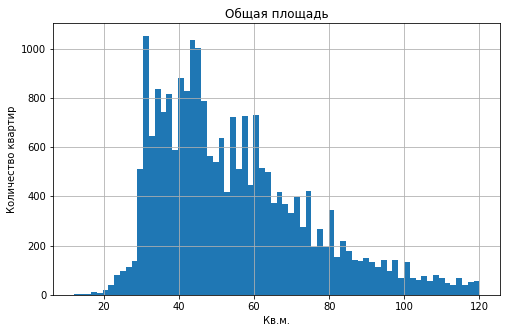

In [16]:
new_total_area = data.loc[data['total_area'] <= 120, 'total_area']
new_total_area.hist(bins = 70, figsize = (8, 5))
plt.xlabel('Кв.м.')
plt.ylabel('Количество квартир')
plt.title('Общая площадь')
plt.show()

Определим количество данных которое мы отбросили в итоге. Оно составляет не более 10%, что является удовлетворительным.

In [17]:
print(new_total_area.describe())
new_total_area.shape[0] / data.shape[0]

count    22637.000000
mean        54.861196
std         20.098237
min         12.000000
25%         39.500000
50%         50.500000
75%         66.000000
max        120.000000
Name: total_area, dtype: float64


0.9551879826153002

На основании построенной гистограммы и описании данных можем сделать выбор о том, что большая часть квартир находится в диапазоне (20 - 120 кв.м). Самыми популярными являются квартиры в диапазоне с общей площадью в 45 и 42 кв.м. Гистограмма, в целом, соответствует распределению Пуассона, но данные имеют разброс (std= 20.1).

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br> Избавился от аномалий, задал наиболее наглядный диапазон 'total_area' <= 120 кв.м. Вывод исправил.
 </div>

**Жилая площадь (кв. метры)**

In [18]:
#data.living_area.sort_values()
#data['living_area'].sort_values(ascending=False).head(10)
data.living_area.describe()

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

В данных видны явные аномалии -  жилая площадь 400 кв.м .Такая площадь теоретически может существовать, но это сложно представимо. Поэтому для более точного анализа показателей, избавимся от них и определим максимум значений в 120 кв.м. и минимум в 5 кв.м.

Построим гистограмму распределения квартир в зависимости от их жилой площади.

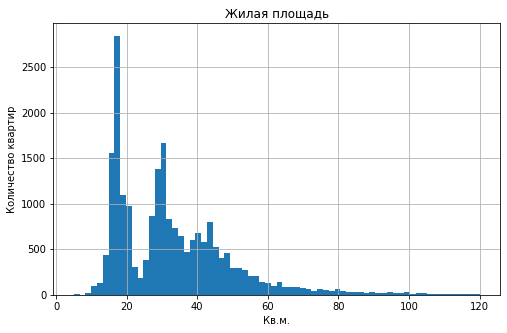

In [19]:
# Построим гистограмму в диапазоне основных значений.
new_living_area = data.loc[(data['living_area'] <= 120) & (data['living_area'] >= 5), 'living_area']
new_living_area.hist(bins = 70, figsize = (8, 5))
plt.xlabel('Кв.м.')
plt.ylabel('Количество квартир')
plt.title('Жилая площадь')
plt.show()

In [20]:
print(new_living_area.describe())
new_living_area.shape[0] / data.shape[0]

count    21576.000000
mean        33.125759
std         16.888306
min          5.000000
25%         18.600000
50%         30.000000
75%         42.000000
max        120.000000
Name: living_area, dtype: float64


0.910418161103844

Определим количество данных которое мы отбросили в итоге. Оно составляет не более 10%, что является удовлетворительным.

На основании построенной гистограммы и описании данных можем сделать выбор о том, что большая часть квартир находится в диапазоне (15 - 60 кв.м). Самыми популярными являются квартиры в диапазоне с жилой площадью примерно 18 и 30 кв.м. Гистограмма, в целом, соответствует распределению Пуассона, но данные имеют разброс (std= 16.8). 

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br> Избавился от аномалий, задал наиболее наглядный диапазон (5-120) кв.м. Вывод исправил.
 </div>

**Площадь кухни (кв. метры)**

In [21]:
#data.kitchen_area.sort_values()
#data['kitchen_area'].sort_values(ascending=False).head(10)
data.kitchen_area.describe()

count    21421.000000
mean        10.569807
std          5.905438
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

В данных видны явные аномалии - площадь кухни 112 кв.м . Такая площадь теоретически может существовать, но это сложно представимо. Поэтому для более точного анализа показателей, избавимся от них и определим максимум значений в 50 кв.м.

Построим гистограмму распределения квартир в зависимости от площади кухни.

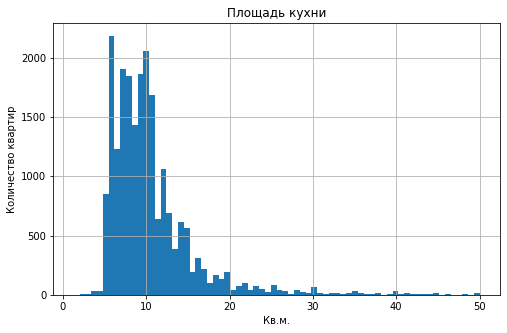

In [22]:
new_kitchen_area = data.loc[data['kitchen_area'] <= 50, 'kitchen_area']
new_kitchen_area.hist(bins = 70, figsize = (8, 5))
plt.xlabel('Кв.м.')
plt.ylabel('Количество квартир')
plt.title('Площадь кухни')
plt.show()

In [23]:
print(new_kitchen_area.describe())
new_kitchen_area.shape[0] / data.shape[0]

count    21375.000000
mean        10.450126
std          5.267284
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max         50.000000
Name: kitchen_area, dtype: float64


0.9019367905818811

Определим количество данных которое мы отбросили в итоге. Оно составляет не более 10%, что является удовлетворительным.

На основании построенной гистограммы и описании данных можем сделать выбор о том, что большая часть квартир находится в диапазоне (5 - 20 кв.м). Самыми популярными являются квартиры с площадью кухни примерно 6 и 10 кв.м. Гистограмма, в целом, соответствует распределению Пуассона, но данные имеют разброс (std= 16.8). 

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br> Избавился от аномалий, задал наиболее наглядный диапазон ('kitchen_area'<=50) кв.м. Вывод исправил.
 </div>

**Цена объекта**

In [24]:
#data.last_price.sort_values()
print(data['last_price'].sort_values(ascending=False).head(10))
data.last_price.describe()

12971    763000000
19540    420000000
14706    401300000
1436     330000000
15651    300000000
22831    289238400
16461    245000000
13749    240000000
5893     230000000
8900     190870000
Name: last_price, dtype: int64


count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

В данных видны явные аномалии - цена квартиры в 763 млн. Такая цена теоретически может существовать, но это сложно представимо. Поэтому для более точного анализа показателей, избавимся от них и определим максимум значений в 20 млн. руб.

Построим гистограмму распределения квартир в зависимости от цены объекта.

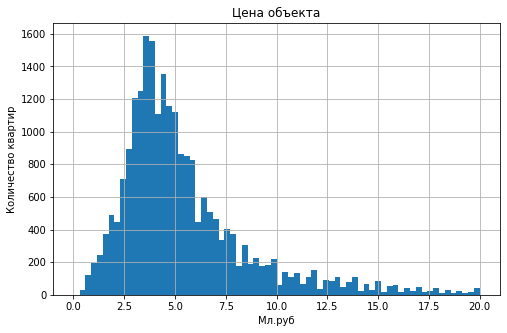

In [25]:
new_last_price = data.loc[data['last_price'] <= 20000000, 'last_price']
(new_last_price/1000000).hist(bins = 70, figsize = (8, 5))
plt.xlabel('Мл.руб')
plt.ylabel('Количество квартир')
plt.title('Цена объекта')
plt.show()

In [26]:
print(new_last_price.describe())
new_last_price.shape[0] / data.shape[0]

count    2.299200e+04
mean     5.423607e+06
std      3.220160e+06
min      1.219000e+04
25%      3.400000e+06
50%      4.550000e+06
75%      6.500000e+06
max      2.000000e+07
Name: last_price, dtype: float64


0.9701675176167771

Определим количество данных которое мы отбросили в итоге. Оно составляет не более 10%, что является удовлетворительным.

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Тут можно разделить все значения в столбце last_price на 1 млн, чтобы они пришли в более понятный вид)
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Привел все значения в более понятный вид, раздел все значения в столбце last_price на 1 млн. Задал наиболее наглядный диапазон ( last_price <= 20 млн руб.). Вывод исправил.
</div>

На основании построенной гистограммы и описании данных можем сделать выбор о том, что большая часть квартир находится в диапазоне (1,5 - 15 мл.руб). Самыми популярными являются квартиры с ценой примерно 3.8, 4 и 4,2 млн.руб. Гистограмма, в целом, соответствует нормальному распределению, разброс данных (std= 3.22). 

**Количество комнат**

In [27]:
#data.rooms.sort_values()
print(data['rooms'].sort_values(ascending=False).head(10))
data.rooms.describe()

14498    19
18848    16
5358     15
20829    14
866      14
19540    12
9688     11
648      11
18119    10
4149     10
Name: rooms, dtype: int64


count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

В данных видны явные аномалии - количество комнат 19. Такая цена теоретически может существовать, но это сложно представимо. Поэтому для более точного анализа показателей, избавимся от них и определим максимум значений в 8 комнат.

Построим гистограмму распределения квартир в зависимости от количества комнат.

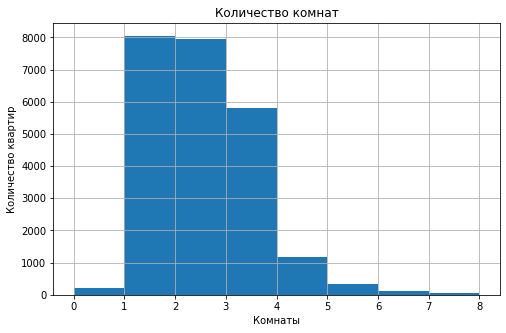

In [28]:
new_rooms = data.loc[data['rooms'] <= 8, 'rooms']
new_rooms.hist(bins = 8, figsize = (8, 5))
plt.xlabel('Комнаты')
plt.ylabel('Количество квартир')
plt.title('Количество комнат')
plt.show()

In [29]:
print(new_rooms.describe())
new_rooms.shape[0] / data.shape[0]

count    23680.00000
mean         2.06326
std          1.04373
min          0.00000
25%          1.00000
50%          2.00000
75%          3.00000
max          8.00000
Name: rooms, dtype: float64


0.9991982784083716

Определим количество данных которое мы отбросили в итоге. Оно составляет не более 10%, что является удовлетворительным.

На основании построенной гистограммы и описании данных можем сделать выбор о том, что большая часть квартир находится в диапазоне (1 - 6 комнат). Самыми популярными являются квартиры с 1, 2 комнатами. Гистограмма, в целом, соответствует распределению Пуассона, разброс данных не значителен (std= 1.04). 

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Привел все значения в более понятный вид, задал наиболее наглядный диапазон ( rooms <= 8 комнат). Вывод исправил.
</div>

**Высота потолков**

In [30]:
#data.ceiling_height.sort_values()
print(data['ceiling_height'].sort_values(ascending=False).head(10))
data.ceiling_height.describe()

22869    100.0
3148      32.0
22336     32.0
21377     27.5
4876      27.0
17857     27.0
5246      27.0
20478     27.0
22938     27.0
5807      27.0
Name: ceiling_height, dtype: float64


count    23699.000000
mean         2.724358
std          0.988298
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

In [31]:
data.ceiling_height.unique()

array([  2.7 ,   2.65,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   3.2 ,   2.61,   3.25,
         3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,   3.3 ,
         2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,   3.4 ,
         3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,   2.58,
         3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,   2.45,
         3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,   3.16,
         3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,   5.  ,
         2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,   2.83,
         4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,   3.18,
         3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,   2.63,
         3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,   3.66,
         3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,   3.36,
        32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,   3.26,
      

В значениях встречаются явные выбросы, которые логически можно объяснить тем, что на самом деле это вещественные значения.
Приведем их к нормальному виду. Перед этим все пропуски были заменены на медианные значения.

In [32]:
# Функция приводит аномальные значения в нормальны вид.
def categorize_ceiling(i):
    if i['ceiling_height'] > 9:
        return (i['ceiling_height'] / 10) 
    else:
        return i['ceiling_height']
data['ceiling_height'] = data.apply(categorize_ceiling, axis=1)
data['ceiling_height'].unique()

array([ 2.7 ,  2.65,  3.03,  2.5 ,  2.67,  2.56,  3.05,  2.75,  2.6 ,
        2.9 ,  2.8 ,  2.55,  3.  ,  3.2 ,  2.61,  3.25,  3.45,  2.77,
        2.85,  2.64,  2.57,  4.15,  3.5 ,  3.3 ,  2.71,  4.  ,  2.47,
        2.73,  2.84,  3.1 ,  2.34,  3.4 ,  3.06,  2.72,  2.54,  2.51,
        2.78,  2.76,  2.58,  3.7 ,  2.52,  5.2 ,  2.87,  2.66,  2.59,
        2.  ,  2.45,  3.6 ,  2.92,  3.11,  3.13,  3.8 ,  3.15,  3.55,
        3.16,  3.62,  3.12,  2.53,  2.74,  2.96,  2.46,  5.3 ,  5.  ,
        2.79,  2.95,  4.06,  2.94,  3.82,  3.54,  3.53,  2.83,  4.7 ,
        2.4 ,  3.38,  3.01,  5.6 ,  3.65,  3.9 ,  3.18,  3.35,  2.3 ,
        3.57,  2.48,  2.62,  2.82,  3.98,  2.63,  3.83,  3.52,  3.95,
        3.75,  2.88,  3.67,  3.87,  3.66,  3.85,  3.86,  4.19,  3.24,
        4.8 ,  4.5 ,  4.2 ,  3.36,  3.08,  3.68,  3.07,  3.37,  3.09,
        8.  ,  3.26,  3.34,  2.81,  3.44,  2.97,  3.14,  4.37,  2.68,
        3.22,  3.27,  4.1 ,  2.93,  3.46,  3.47,  3.33,  3.63,  3.32,
        1.2 ,  8.3 ,

Построим гистограмму распределения квартир в зависимости от высоты потолков.

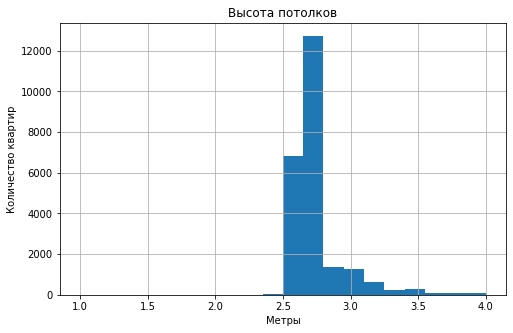

In [33]:
data.ceiling_height.hist(bins = 20, range = (1, 4), figsize = (8, 5))
plt.xlabel('Метры')
plt.ylabel('Количество квартир')
plt.title('Высота потолков')
plt.show()

На основании построенной гистограммы и описании данных можем сделать выбор о том, что большая часть квартир находится в диапазоне (2.5 - 3.5 комнат). Самыми популярными являются квартиры с потолками примерно 2.7м. Гистограмма, в целом, соответствует распределению Пуассона, разброс данных не значителен (std= 0.98). В данных имеются аномалии, которые логически можно объяснить тем, что на самом деле это вещественные значения. Перед построением гистограммы были внесены изменения. Все пропуски были заменены на медианные значения.

**Этаж квартиры**

In [34]:
#data.floor.sort_values()
#data['floor'].sort_values(ascending=False).head(50)
data.floor.describe()

count    23699.000000
mean         5.892358
std          4.885249
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

Поскольку ранее мы категоризировали данные о этажах в отдельный столбец, то можем посмотреть распределение и по типу этажа и по количеству. Построим соответствующие гистограммы.

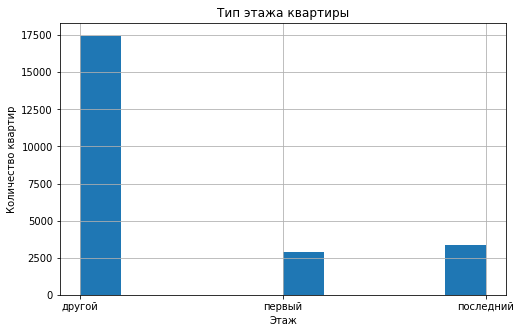

In [35]:
data.type_of_floor.hist(figsize = (8, 5))
plt.xlabel('Этаж')
plt.ylabel('Количество квартир')
plt.title('Тип этажа квартиры')
plt.show()

На основании построенных гистограмм и описании данных можем сделать выбор о том, что первый и последний этажи являются мнее популярными вариантами в сравнении с остальными этажами. 

**Общее количество этажей в доме**

In [36]:
#data.floors_total.sort_values()
print(data['floors_total'].sort_values(ascending=False).head(10))
data.floors_total.describe()

2253     60.0
16731    52.0
16934    37.0
397      36.0
5807     36.0
11079    36.0
4855     35.0
18617    35.0
5808     35.0
13975    35.0
Name: floors_total, dtype: float64


count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

Построим гистограмму распределения квартир в зависимости от общего количества этажей в доме.

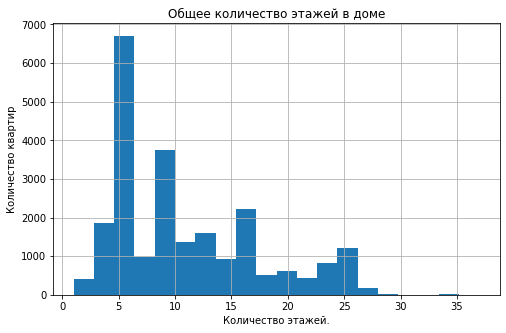

In [37]:
new_floors_total = data.loc[data['floors_total'] <= 45, 'floors_total']
new_floors_total.hist(bins = 20, figsize = (8, 5))
plt.xlabel('Количество этажей.')
plt.ylabel('Количество квартир')
plt.title('Общее количество этажей в доме')
plt.show()

In [38]:
print(new_floors_total.describe())
new_floors_total.shape[0] / data.shape[0]

count    23611.000000
mean        10.669984
std          6.584146
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         37.000000
Name: floors_total, dtype: float64


0.9962867631545634

Определим количество данных которое мы отбросили в итоге. Оно составляет не более 10%, что является удовлетворительным.

На основании построенных гистограмм и описании данных можем сделать выбор о том, что большая часть квартир находится в 5 и 9 этажных домах, это самые популярные варианты. Гистограмма, в целом, соответствует распределению Пуассона.

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Привел все значения в более понятный вид, задал наиболее наглядный диапазон (floors_total <= 45 этажей). Вывод исправил.
</div>

**Расстояние до центра города в метрах**

In [39]:
#data.city_centers_nearest.sort_values()
#data['city_centers_nearest'].sort_values(ascending=False).head(50)
data.city_centers_nearest.describe()

count    18180.000000
mean     14191.277833
std       8608.386210
min        181.000000
25%       9238.000000
50%      13098.500000
75%      16293.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

Построим гистограмму распределения квартир в зависимости от расстояния до центра города (м).

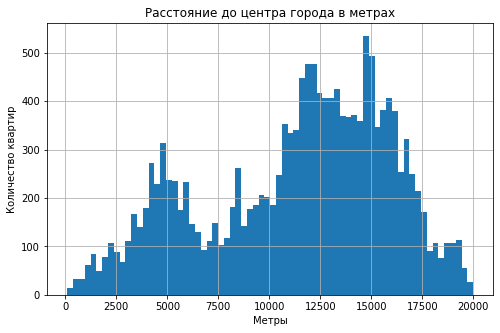

In [40]:
data.city_centers_nearest.hist(bins = 70, range = (100, 20000), figsize = (8, 5))
plt.xlabel('Метры')
plt.ylabel('Количество квартир')
plt.title('Расстояние до центра города в метрах')
plt.show()

На основании построенной гистограммы и описании данных можем сделать выбор о том, что большая часть квартир находится в диапазоне (1000-20000 м.). Самыми популярными являются квартиры с расстояние до центра примерно 15, 12 и 5 км. В данных имеются аномалии, но их природа не однозначна и восстановить корректные значения не получится. Поэтому оставляем диапазон основных значений, исключив аномальные при построении гистограммы. 

**Расстояние до ближайшего парка**

In [41]:
#data.parks_nearest.sort_values()
#data['parks_nearest'].sort_values(ascending=False).head(50)
data.parks_nearest.describe()

count    8079.000000
mean      490.804555
std       342.317995
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

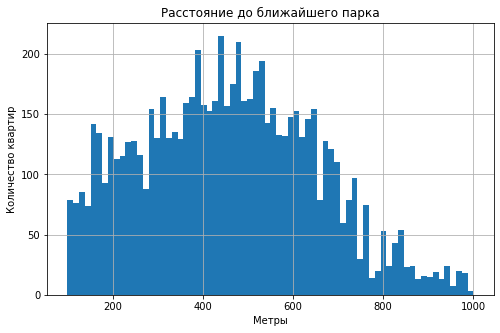

In [42]:
data.parks_nearest.hist(bins = 70, range = (100, 1000), figsize = (8, 5))
plt.xlabel('Метры')
plt.ylabel('Количество квартир')
plt.title('Расстояние до ближайшего парка')
plt.show()

На основании построенной гистограммы и описании данных можем сделать выбор о том, что большая часть квартир находится в диапазоне (100 - 1000 м.). Самыми популярными являются квартиры с расстоянием до ближайшего парка примерно 450 и 500 м. Гистограмма, в целом, соответствует нормальному распределению, разброс данных значителен (std= 342.3). В данных имеются аномалии, но их природа не однозначна и восстановить корректные значения не получится. Поэтому оставляем диапазон основных значений, исключив аномальные при построении гистограммы. 

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Ты корректно подбираешь основные диапазоны, а также верно читаешь графики! 
</div>

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>Давай детальнее изучим аномалии в некоторых столбцах. Аномальное значение не значит, что оно нереальное или не может существовать. Это значит, что такое значение выделяется на общем фоне и встретить его большая редкость. Посмотри какие значения есть в столбцах со стоимостью квартиры, количеством комнат и общей площадью. Кажется, в них есть значения, которые сильно выделяются на общем фоне (слишком высокие). Не забудь проверить какое количество данных мы в итоге отбрасываем. Это количество не должно превышать 10% от изначального объёма данных. C этим может помочь следующий код

	new_data.shape[0] / old_data.shape[0]
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br> Обработал аномалии в столбцах, где это было необходимо, задал наиболее наглядные диапазоны значений. Выводы исправил.
</div>

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v2:</b> 
<br>В данном задании важно не просто определить границы для аномалий, а ещё удалить их в том датасете, с которым ты работаешь дальше. Не нужно делать отдельные переменные для каждого среза, все изменения нужно сохранять в одном датасете, с которым ты будешь работать дальше

**Изученте темпа продажи квартир.(days_exposition)**

In [43]:
data.days_exposition.sort_values()
data['days_exposition'].sort_values(ascending=False).head(50)
data.days_exposition.describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Построим гистограмму темпа продажи квартир в рамках одного года.

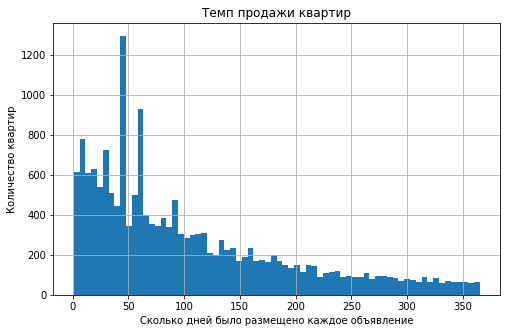

In [44]:
data.days_exposition.hist(bins = 70, range = (1, 365), figsize = (8, 5))
plt.xlabel('Сколько дней было размещено каждое объявление')
plt.ylabel('Количество квартир')
plt.title('Темп продажи квартир')
plt.show()

На основании построенной гистограммы и описании данных можем сделать выбор о том, что темп продажи большинства квартир находится примерно в диапазоне от 2.5 до 3 месяцев (45-60 дней). Среднее значение темпа продажи квартиры составляет 180 дней, медиана составляет 95 дней, что подтверждает сделанные выводы. На мой взгляд, быстрыми продажами можно считать те, что уложились в первые 45 дней продаж (Q1), за норму будем считать время от 95-230 (Q2-Q3), медленным же будем считать те, что вышли за рамки 230 дней продаж (Q3). 

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>А как бы ты объяснил эти пики в районе 45 и 60 дней?
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>На мой взгляд, это может быть связано с тем, что через 45 - 60 дней безуспешных продаж собственник, как правило, снижает цену и с большей вероятностью находит клиента в коротчайшие сроки.
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b> 
<br>Это особенность функционирования системы размещения объявлений) Убедиться в этом можно по ссылке ниже

	https://yandex.ru/support/realty/owner/home/add-ads-housing.html
</div>

**Определим факторы, которые больше всего влияют на общую стоимость объекта.**

Рассмотрим следующие факторы и определим зависимость межу общей площадью и полной стоимостью квартир в основном диапазоне значений. Определим коэффициент корреляции и построим график зависимости для данных величин.

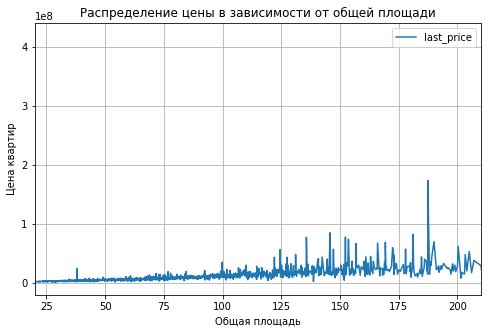

Коэффициент корреляции данных величин равен: 0.65


In [45]:
data.pivot_table(index='total_area', values='last_price').plot(style='-', grid=True, figsize = (8, 5))
plt.xlim(20, 210)
plt.xlabel('Общая площадь')
plt.ylabel('Цена квартир')
plt.title('Распределение цены в зависимости от общей площади')
plt.show()
print('Коэффициент корреляции данных величин равен:', data['total_area'].corr(data['last_price']).round(2))

На основании построенного графика можем сделать выбор о том, существует зависимость между общей площадью и полной стоимостью квартир. Коэффициент корреляции = 0.65 подтверждает наличие зависимости. Увеличение разброса цен наблюдается постепенно. Сначала у квартир с общей площадью свыше 120 кв.м, затем у квартир с общей площадью свыше 180 кв.м.

Рассмотрим следующие факторы и определим зависимость межу жилой площадью и полной стоимостью квартир в основном диапазоне значений. Определим коэффициент корреляции и построим график зависимости для данных величин.

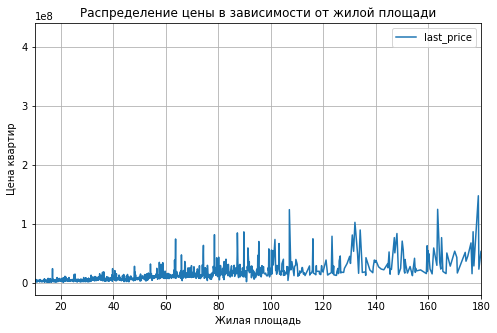

Коэффициент корреляции данных величин равен: 0.57


In [46]:
data.pivot_table(index='living_area', values='last_price').plot(style='-', grid=True, figsize = (8, 5))
plt.xlim(10, 180)
plt.xlabel('Жилая площадь')
plt.ylabel('Цена квартир')
plt.title('Распределение цены в зависимости от жилой площади')
plt.show()
print('Коэффициент корреляции данных величин равен:', data['living_area'].corr(data['last_price']).round(2))

На основании построенного графика можем сделать выбор о том, существует умеренная зависимость между жилой площадью и полной стоимостью квартир. Коэффициент корреляции = 0.57 подтверждает это. Увеличение разброса цен наблюдается у квартир с общей площадью свыше 120 кв.м. Значения могут увеличиваться, но не обязательно в точной пропорции.

Рассмотрим следующие факторы и определим зависимость межу площадью кухни и полной стоимостью квартир в основном диапазоне значений. Определим коэффициент корреляции и построим график зависимости для данных величин.

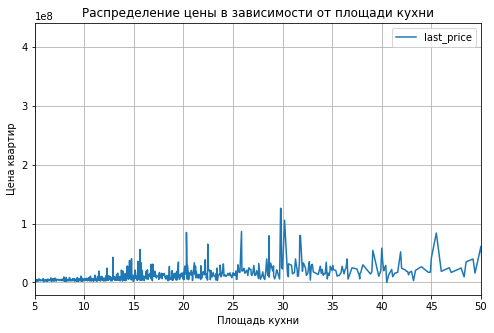

Коэффициент корреляции данных величин равен: 0.52


In [47]:
data.pivot_table(index='kitchen_area', values='last_price').plot(style='-', grid=True, figsize = (8, 5))
plt.xlim(5, 50)
plt.xlabel('Площадь кухни')
plt.ylabel('Цена квартир')
plt.title('Распределение цены в зависимости от площади кухни')
plt.show()
print('Коэффициент корреляции данных величин равен:', data['kitchen_area'].corr(data['last_price']).round(2))

На основании построенного графика можем сделать выбор о том, существует умеренная зависимость между площадью кухни и полной стоимостью квартир. Коэффициент корреляции = 0.52 подтверждает это. Значения могут увеличиваться, но не обязательно в точной пропорции.

Рассмотрим следующие факторы и определим зависимость межу количеством комнат и полной стоимостью квартир в основном диапазоне значений. Определим коэффициент корреляции и построим график зависимости для данных величин.

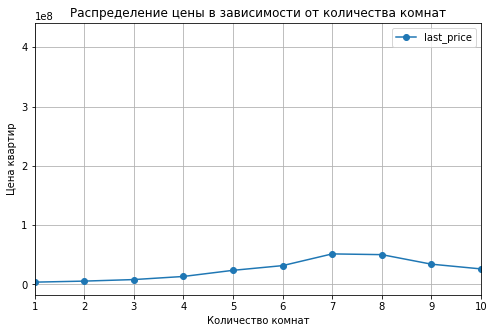

Коэффициент корреляции данных величин равен: 0.36


In [48]:
data.pivot_table(index='rooms', values='last_price').plot(style='o-', grid=True, figsize = (8, 5))
plt.xlim(1, 10)
plt.xlabel('Количество комнат')
plt.ylabel('Цена квартир')
plt.title('Распределение цены в зависимости от количества комнат')
plt.show()
print('Коэффициент корреляции данных величин равен:', data['rooms'].corr(data['last_price']).round(2))

На основании построенного графика можем сделать выбор о том, существует зависимость между количествов комнат и полной стоимостью квартир. Коэффициент корреляции = 0.36 подтверждает это. Значения могут увеличиваться, но не обязательно в точной пропорции.

Рассмотрим следующие факторы и определим зависимость межу этажем и полной стоимостью квартир.Определим коэффициент корреляции и построим график зависимости для данных величин.

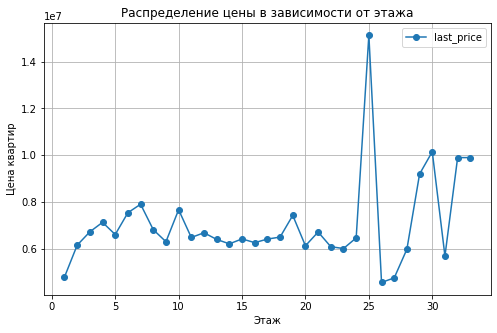

Коэффициент корреляции данных величин равен: 0.03


In [49]:
data.pivot_table(index='floor', values='last_price').plot(style='o-', grid=True, figsize = (8, 5))
#plt.xlim(1, 32)
plt.xlabel('Этаж')
plt.ylabel('Цена квартир')
plt.title('Распределение цены в зависимости от этажа')
plt.show()
print('Коэффициент корреляции данных величин равен:', data['floor'].corr(data['last_price']).round(2))

На основании построенного графика можем сделать выбор о том, зависимость между жилой площадью и полной стоимостью квартир практически отсутствует (крайне слабо выражена). Коэффициент корреляции = 0.03 подтверждает это. Значения могут увеличиваться, но не обязательно в точной пропорции.

Рассмотрим следующие факторы и определим зависимость межу типом этажем и полной стоимостью квартир. Построим гистограмму для данных величин.

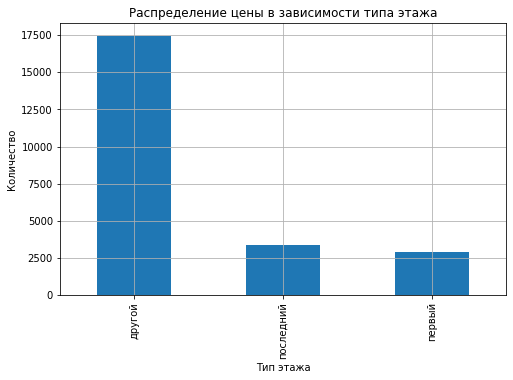

In [50]:
# Строим гистограмму, так как она, в данном случае, нагляднее.
data['type_of_floor'].value_counts().plot(kind='bar', grid=True, figsize = (8, 5))
plt.xlabel('Тип этажа')
plt.ylabel('Количество')
plt.title('Распределение цены в зависимости типа этажа')
plt.show()

На основании построенной диаграммы можем сделать выбор о том, что квартиры на первом и последнем этажах значительно дешевле. Наименьшую цену имеют квартиры на первом этаже, с необольшой разницей в цене продаются квартиры на последнем этаже. Линейной зависимости не наблюдается.

Рассмотрим следующие факторы и определим зависимость межу днем недели размещения и полной стоимостью квартир. Определим коэффициент корреляции и построим график зависимости для данных величин.

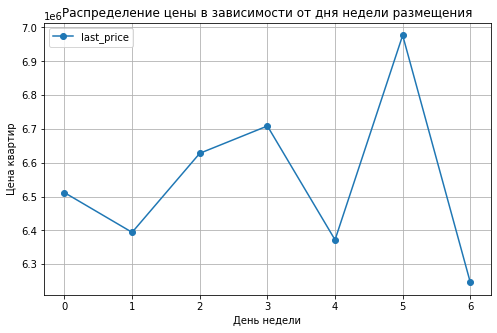

In [51]:
data.pivot_table(index='publication_weekday', values='last_price').plot(style='o-', grid=True, figsize = (8, 5))
plt.xlabel('День недели')
plt.ylabel('Цена квартир')
plt.title('Распределение цены в зависимости от дня недели размещения')
plt.show()

На основании построенного графика можем сделать выбор о том, что зависимость межу днем недели размещения и полной стоимостью квартиры отсутствует.

Рассмотрим следующие факторы и определим зависимость межу месяцем размещения и полной стоимостью квартир. Определим коэффициент корреляции и построим график зависимости для данных величин.

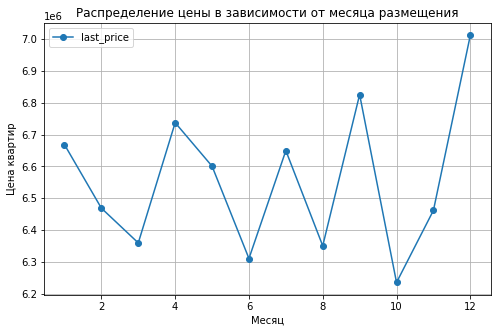

In [52]:
data.pivot_table(index='publication_month', values='last_price').plot(style='o-', grid=True, figsize = (8, 5))
plt.xlabel('Месяц')
plt.ylabel('Цена квартир')
plt.title('Распределение цены в зависимости от месяца размещения')
plt.show()

На основании построенного графика можем сделать выбор о том, что зависимость межу месяцем размещения и полной стоимостью квартиры отсутствует. Можно сказать лишь о том, что повышение цен наблюдается в апреле, сентябре и ноябре. 

Рассмотрим следующие факторы и определим зависимость межу годом размещения и полной стоимостью квартир. Определим коэффициент корреляции и построим график зависимости для данных величин.

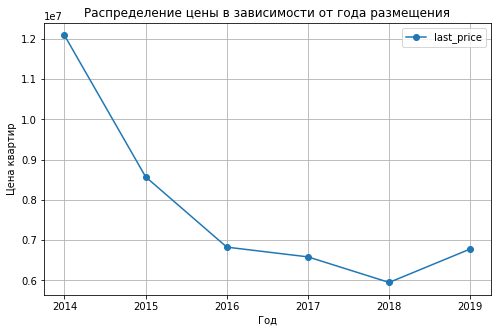

In [53]:
data.pivot_table(index='publication_year', values='last_price').plot(style='o-', grid=True, figsize = (8, 5))
plt.xlabel('Год')
plt.ylabel('Цена квартир')
plt.title('Распределение цены в зависимости от года размещения')
plt.show()

На основании построенного графика можем сделать выбор о том, что зависимость межу годом размещения и полной стоимостью практически отсутствует. Можно сказать лишь о том, что с 2018 года наблюдается постепенный рост цен.

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>Рассчитывать корреляцию Пирсона для дня недели, месяца и года продажи не эффективно, так как цена в данном случае зависит от них не линейно, ведь это категориальные переменные. Чтобы изучить зависимость для этих параметров лучше построить bar plot или гистограмму рассчитав среднее значение или медиану. Графики у тебя уже есть, поэтому остаётся только удалить расчет корреляции)
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br> Удалил расчет корреляции для дня недели, месяца и года. Выводы исправил.
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b>
<br>Правка выполнена 👍
</div>

**Определим среднюю цену одного квадратного метра в десяти населенных пунктах с наибольшим числом объявлений.**

Построим сводные таблицы с количеством объявлений и средней ценой квадратного метра для этих населенных пунктов, отсортируем по убыванию. Затем, объеденим полученные таблицы в одну методом merge() и выведем 10 наиболее популярных пунктов.

In [54]:
count_price = data.pivot_table(index='locality_name', values='last_price', aggfunc='count').sort_values(by='last_price', ascending=False)
square_price = data.pivot_table(index='locality_name', values='square_meter_price', aggfunc='mean').sort_values(by='square_meter_price', ascending=False) 
result_table = count_price.merge(square_price, on='locality_name', how='inner').round(2).head(10) 
result_table.columns = ['Количество квартир','Цена за кв. метр']
result_table.head(10)

,Количество квартир,Цена за кв. метр
locality_name,,
Санкт-Петербург,15721,114849.01
Мурино,590,86087.51
Кудрово,472,95324.93
Шушары,440,78677.36
Всеволожск,398,68654.47
Пушкин,369,103125.82
Колпино,338,75424.58
Парголово,327,90175.91
Гатчина,307,68746.15


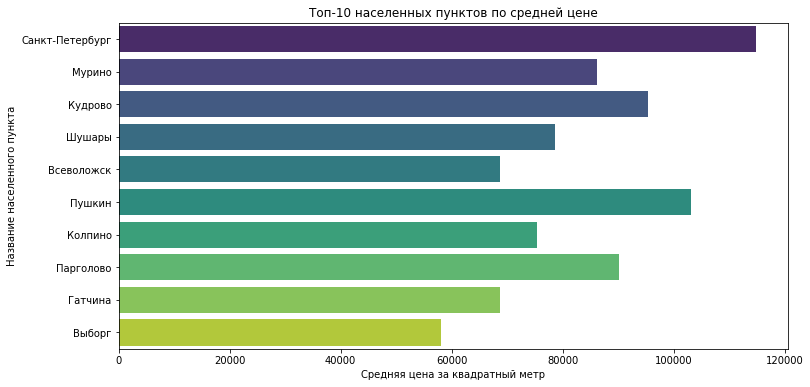

In [55]:
plt.figure (figsize = (12, 6))
sns.barplot(x='Цена за кв. метр', y=result_table.index, data=result_table, palette='viridis')
plt.title('Топ-10 населенных пунктов по средней цене')
plt.xlabel('Средняя цена за квадратный метр')
plt.ylabel('Название населенного пункта')
plt.show()

На основании построенной таблицы можем сделать выбор о том, что среди представленных населенных пунктах наибольшая средняя стоимость за квадратный метр наблюдается в Санкт-Петербурге (114849), минимальная стоимость за квадратный метр наблюдается в Выборге(58141). 

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Всё верно! Как вариант, тут можно построить барплот для топ10 по средней цене, так будет более наглядно)
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br> Добавил barplot для топ10 по средней цене, как ты советовал.
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b>
<br>Отлично! Не забывай про сортировку)
</div>

**Определим зависимость средней стоимости квадратного метра от удаленности квартиры от центра Санкт-Петербурга.**

Сделаем срез по Санкт-Петербургу, и построим график зависимости средней цены для каждого километра от центра Петербурга.

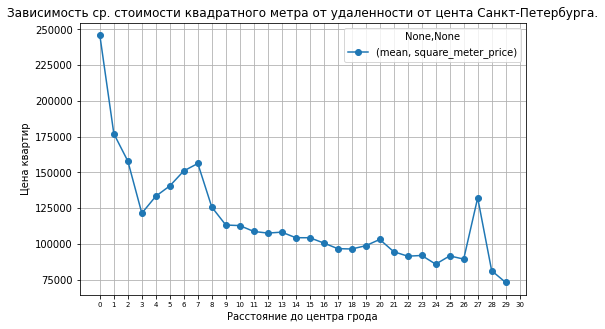

Коэффициент корреляции данных величин равен: -0.32


In [56]:
data.query('locality_name == "Санкт-Петербург"').pivot_table(index='center_distance', values=['square_meter_price'], aggfunc=['mean']).plot(style='o-', grid=True, figsize = (8, 5))
#plt.xlim(0, 15)
plt.xlabel('Расстояние до центра грода')
plt.ylabel('Цена квартир')
plt.title('Зависимость ср. стоимости квадратного метра от удаленности от цента Санкт-Петербурга.')
#Уменьшаем размер, чтобы видеть каждый км.
plt.xticks(np.arange(0, 31, 1), fontsize=7)
plt.show()
print('Коэффициент корреляции данных величин равен:', data['center_distance'].corr(data['square_meter_price']).round(2))

Также, для наглядности выведем таблицу с ценой на каждый километр.

In [57]:
data.query('locality_name == "Санкт-Петербург"').pivot_table(values='last_price', index='center_distance')

,last_price
center_distance,
0.0,3.144912e+07
1.0,2.120672e+07
2.0,1.778832e+07
3.0,1.112658e+07
4.0,1.330428e+07
5.0,1.449912e+07
6.0,1.533842e+07
7.0,1.477515e+07
8.0,9.957717e+06


На основании построенного графика и наличия отрицательной корреляции (std=-0.32) между рассматриваемыми величинами, можем сделать выбор о том, существует зависимость между ср. стоимостью квадратного метра и расстоянием до цента Санкт-Петербурга. Так, при увеличении значений одной величины, значения другой переменной склонны уменьшаться, и наоборот. Можно отметить общую тенденцию на снижение стоимости недвижимости при удалении от центра города. В самом центре (примерно 0-3 км) располагается самая дорогая недвижимость. При этом, вне условного центра города существуют пики стоимости при расстоянии  примерно 6 и 27 км. 

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b>
<br>Отличный анализ 👍
</div>

**В рамках проведения предобработки данных о надёжности заемщиков, полученные данные прошли следующие этапы:**

- Удалены пропуски (замена медианными значениями),
- Обработаны аномальные значения,
- Исправлены типы данных,
- Обработаны неявные дубликаты,
- Добавлены новые столбцы
- Проведена категоризация данных по различным параметрам,
- Исследовательский анализ данных, определение зависимостей в данных.

В рамках проведенного исследования найдены определенные особенности и зависимости, существующие на рынке недвижимости.
Был проанализирован широкий список параметров, описанных в общей части работы. Столбцы, в которых это было необходимо были очищенны от аномалий. По каждому из них был сформирован промежуточный вывод относительно влияния на продажи квартир.

Также, в рамках проведения более подробного анализа показателей были выполнены следующие этапы:

**Изучены темпы продажи квартиры:**
Темп продажи большинства квартир находится примерно в диапазоне от 2.5 до 3 месяцев (45-60 дней). Среднее значение темпа продажи квартиры составляет 180 дней, медиана составляет 95 дней, что подтверждает сделанные выводы. На мой взгляд, быстрыми продажами можно считать те, что уложились в первые 45 дней продаж (Q1), за норму будем считать время от 95-230 (Q2-Q3), медленным же будем считать те, что вышли за рамки 230 дней продаж (Q3).

**Определены факторы, оказывающие наибольшее влияние на общую (полную) стоимость объекта:**
На стоимость больше влияет площадь квартиры, как общая (коэффициент корреляции = 0.65), так и жилая (коэффициент корреляции = 0.57), нежели число комнат (коэффициент корреляции = 0.36). Также, можно сделать вывод о том, что квартиры на первом и последнем этажах значительно дешевле. Наименьшую цену имеют квартиры на первом этаже, с небольшой разницей в цене продаются квартиры на последнем этаже.

**Определены населённые пункты с самой высокой и низкой стоимостью квадратного метра:**
Среди представленных населенных пунктах наибольшая средняя стоимость за квадратный метр наблюдается в Санкт-Петербурге (114849), минимальная стоимость за квадратный метр наблюдается в Выборге (58141).

**Определена зависимость средней стоимости квадратного метра от удаленности квартиры от центра Санкт-Петербурга:**
На основании проведенного анализа была выявлена отрицательная корреляции (std=-0.32) между рассматриваемыми величинами, следовательно, можно отметить общую тенденцию на снижение стоимости недвижимости при удалении от центра города. В самом центре (примерно 0-3 км) располагается самая дорогая недвижимость. При этом, вне условного центра города существуют пики стоимости при расстоянии примерно 6 и 27 км.

<div class="alert alert-danger">
<b>❌ Итоговый комментарий ревьюера v1:</b> 
<br>Необходимо поправить:
<br>- написать короткий вывод после первичного просмотра данных
<br>- отбросить аномальные значения 
<br>- удалить расчет корреляции для времени продажи

<br>После всех внесённых правок не забудь поправить выводы там, где это необходимо
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br> Вроде бы все правки внес.
</div>

<div class="alert alert-success">
<b>✔️ Итоговый комментарий ревьюера v2:</b>
<br>Все правки выполнены. Молодец!
<br>Я рад был поработать над проверкой твоей работы) В качестве дополнительного материала для изучения могу порекомендовать следующий ресурс:

	https://www.python-graph-gallery.com/
<br>В нем содержится большая библиотека графиков с готовым кодом, который можно использовать при работе.
<br>Поздравляю со сдачей проекта и желаю удачи в дальнейшем обучении! 😉    
</div>

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Файл с данными открыт.
- [x]  Файл с данными изучен: выведены первые строки, использован метод `info()`, построены гистограммы.
- [x]  Найдены пропущенные значения.
- [x]  Пропущенные значения заполнены там, где это возможно.
- [x]  Объяснено, какие пропущенные значения обнаружены.
- [x]  В каждом столбце установлен корректный тип данных.
- [x]  Объяснено, в каких столбцах изменён тип данных и почему.
- [x]  Устранены неявные дубликаты в названиях населённых пунктов.
- [x]  Обработаны редкие и выбивающиеся значения (аномалии).
- [x]  В таблицу добавлены новые параметры:
       – цена одного квадратного метра;
       – день публикации объявления (0 - понедельник, 1 - вторник и т. д.);
       – месяц публикации объявления;
       – год публикации объявления;
       – тип этажа квартиры (значения — «первый», «последний», «другой»);
       – расстояние до центра города в километрах.
- [x]  Изучены и описаны параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего парка.
- [x]  Выполнено задание «Изучите, как быстро продавались квартиры (столбец `days_exposition`)»:
    - построена гистограмма;
    - рассчитаны среднее и медиана;
    - описано, сколько обычно занимает продажа и указано, какие продажи можно считать быстрыми, а какие — необычно долгими.
- [x]  Выполнено задание «Определите факторы, которые больше всего влияют на общую (полную) стоимость объекта». Построены графики, которые показывают зависимость цены от параметров:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - количество комнат;
        - тип этажа, на котором расположена квартира (первый, последний, другой);
        - дата размещения (день недели, месяц, год).
- [x]  Выполнено задание «Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений»:
    - выделены населённые пункты с самой высокой и низкой стоимостью квадратного метра.
- [x]  Выполнено задание «Выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите их среднюю стоимость на разном удалении от центра»:
    -  учтён каждый километр расстояния, известны средние цены квартир в одном километре от центра, в двух и так далее;
    -  описано, как стоимость объекта зависит от расстояния до центра города;
    -  построен график изменения средней цены для каждого километра от центра Петербурга.
- [x]  На каждом этапе сделаны промежуточные выводы.
- [x]  В конце проекта сделан общий вывод.